In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib
import os 
%matplotlib inline

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df=df.dropna(subset=['RainTomorrow'])

In [4]:
df['year'] = pd.to_datetime(df['Date']).dt.year
train_df = df[df['year']<2015]
val_df = df[df['year']==2015]
test_df = df[df['year']>2015]

In [5]:
input_cols =list(train_df.columns)[1:-2]
target_col = 'RainTomorrow'

In [6]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_target = val_df[target_col]

test_inputs = test_df[input_cols]
test_target = test_df[target_col]

In [7]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs .select_dtypes('object').columns.tolist()

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [10]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


C:\Users\danie\AppData\Local\Temp\ipykernel_10200\1868297225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_10200\1868297225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_10200\1868297225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [13]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

C:\Users\danie\AppData\Local\Temp\ipykernel_10200\4107820477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_10200\4107820477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_10200\4107820477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])

In [16]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [17]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\danie\AppData\Local\Temp\ipykernel_10200\1584174743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_10200\1584174743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\danie\AppData\Local\Temp\ipykernel_10200\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [18]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val = val_inputs[numeric_cols+encoded_cols]
x_test = test_inputs[numeric_cols+encoded_cols]

In [19]:
train_targets.isna().sum()

np.int64(0)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(random_state=69,n_jobs=-1)

In [22]:
model.fit(x_train,train_targets)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
model.score(x_train,train_targets)

0.9999797955307714

In [24]:
model.score(x_val,val_target)

0.8559572862863444

In [25]:
train_probs =model.predict_proba(x_train)
train_probs

array([[0.91, 0.09],
       [0.94, 0.06],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.92, 0.08]], shape=(98988, 2))

In [26]:
len(model.estimators_)

100

In [27]:
model.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,1272380470
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
importance_df = pd.DataFrame({'feature':x_train.columns,
                              'importance':model.feature_importances_}).sort_values(by='importance',ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

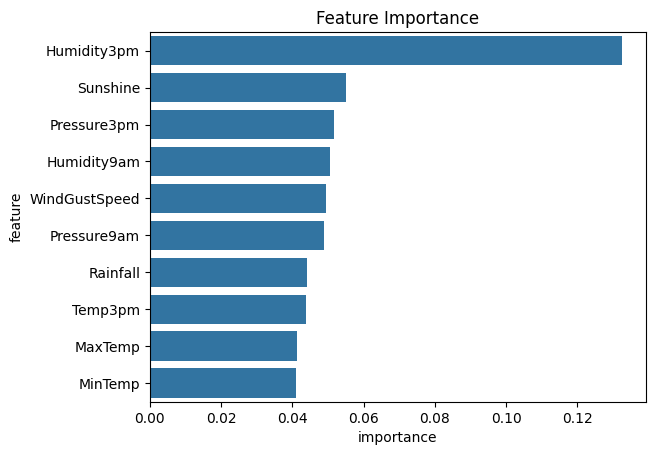

In [29]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

In [30]:
def test_parameters(**params):
    model = RandomForestClassifier(random_state=69,n_jobs=-1,**params).fit(x_train,train_targets)
    return model.score(x_train,train_targets) , model.score(x_val,val_target)

In [31]:
test_parameters(max_depth=5)

(0.8194932719117469, 0.8244443154779177)

In [33]:
test_parameters(max_depth=17)

(0.9165454398512951, 0.8534037490569323)

In [ ]:
test_parameters(max_leaf_nodes=2**11)

(0.9999696932961571, 0.8561313910974406)